# INFO 2950 Group Project: What Makes a Nobel Prize Laureate?

## Research Questions:
1. What region of the world produces the most Nobel Prize laureates?
2. At what age is your likelihood of winning the highest?
3. Are Nobel Prize laureates getting older?
4. Which universities dominate the Nobel Prize?
5. Does Nobel Prize favor one gender over another?
6. What proportion of laureates won the Nobel Prize twice or more?
7. What proportion of laureates are family members?

## Data & Data Cleaning

**Step 1:** Imported libraries for our data analysis.

In [142]:
import pandas as pd 
import numpy as np
import seaborn 
from matplotlib import pyplot
from datetime import datetime, date

**Step 2:** Loaded the CSV file, laureate.csv, into a pandas data frame called nobel_data_raw and printed nobel_data_raw to check laureate.csv was loaded correctly into the data frame.

In [143]:
nobel_data_raw = pd.read_csv("laureate.csv")
print(nobel_data_raw)

      id       firstname    surname        born        died  \
0      1  Wilhelm Conrad    Röntgen  1845-03-27  1923-02-10   
1      2  Hendrik Antoon    Lorentz  1853-07-18  1928-02-04   
2      3          Pieter     Zeeman  1865-05-25  1943-10-09   
3      4   Antoine Henri  Becquerel  1852-12-15  1908-08-25   
4      5          Pierre      Curie  1859-05-15  1906-04-19   
..   ...             ...        ...         ...         ...   
970  933      Bernard L.    Feringa  1951-05-18  0000-00-00   
971  934     Juan Manuel     Santos  0000-00-00  0000-00-00   
972  935          Oliver       Hart  1948-10-09  0000-00-00   
973  936           Bengt  Holmström  1949-04-18  0000-00-00   
974  937             Bob      Dylan  1941-05-24  0000-00-00   

               bornCountry bornCountryCode                bornCity  \
0    Prussia (now Germany)              DE  Lennep (now Remscheid)   
1          the Netherlands              NL                  Arnhem   
2          the Netherlands       

**Step 3:** Printed out the number of rows and columns in nobel_data_raw to make sure that it matches the number of rows and columns of laureate.csv.

In [144]:
nobel_data_raw.shape

(975, 20)

**Step 4:** Printed out the type of each column so that we know if we need to convert to another type in our upcoming data analysis.

In [145]:
nobel_data_raw.dtypes

id                     int64
firstname             object
surname               object
born                  object
died                  object
bornCountry           object
bornCountryCode       object
bornCity              object
diedCountry           object
diedCountryCode       object
diedCity              object
gender                object
year                 float64
category              object
overallMotivation     object
share                float64
motivation            object
name                  object
city                  object
country               object
dtype: object

**Step 5:** We converted values in 'born' and 'died' columns to datetime. If the values were not formatted to be able to convert to datetime, such as "0000-00-00," we renamed those values as "NaT". We also printed out the data frame to check if the columns were displaying values in datetime and in NaT properly.

In [146]:
nobel_data_raw['born'] = pd.to_datetime(nobel_data_raw['born'], format = '%Y-%m-%d', errors = 'coerce')
nobel_data_raw['died'] = pd.to_datetime(nobel_data_raw['died'], format = '%Y-%m-%d', errors = 'coerce')
print(nobel_data_raw)

      id       firstname    surname       born       died  \
0      1  Wilhelm Conrad    Röntgen 1845-03-27 1923-02-10   
1      2  Hendrik Antoon    Lorentz 1853-07-18 1928-02-04   
2      3          Pieter     Zeeman 1865-05-25 1943-10-09   
3      4   Antoine Henri  Becquerel 1852-12-15 1908-08-25   
4      5          Pierre      Curie 1859-05-15 1906-04-19   
..   ...             ...        ...        ...        ...   
970  933      Bernard L.    Feringa 1951-05-18        NaT   
971  934     Juan Manuel     Santos        NaT        NaT   
972  935          Oliver       Hart 1948-10-09        NaT   
973  936           Bengt  Holmström 1949-04-18        NaT   
974  937             Bob      Dylan 1941-05-24        NaT   

               bornCountry bornCountryCode                bornCity  \
0    Prussia (now Germany)              DE  Lennep (now Remscheid)   
1          the Netherlands              NL                  Arnhem   
2          the Netherlands              NL              Z

**Step 6:** We found the age in days of each laureate in the dataframe by using the "year" and year extracted from datetime values in the 'born' column. We made a new column called "age" because it will help us answer a few of our research questions. The values in the 'age' column were rounded down using np.floor to accurately represent each laureate's age at the time of their win. We also used .fillna() to fill missing "age" values with 0 to create models in the future without any errors involving NaN. Lastly, we used .head() to check if our data frame includes the new column.

In [147]:
nobel_data_raw['age'] = nobel_data_raw['year'] - nobel_data_raw['born'].dt.year
nobel_data_raw['age'] = nobel_data_raw['age'].apply(np.floor)
nobel_data_raw['age'] = nobel_data_raw['age'].fillna(0)
nobel_data_raw['age'] = nobel_data_raw['age'].astype(int)
nobel_data_raw.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,gender,year,category,overallMotivation,share,motivation,name,city,country,age
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,...,male,1901.0,physics,NaN,1.0,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany,56
1,2,Hendrik Antoon,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,...,male,1902.0,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Leiden University,Leiden,the Netherlands,49
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,...,male,1902.0,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Amsterdam University,Amsterdam,the Netherlands,37
3,4,Antoine Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,...,male,1903.0,physics,NaN,2.0,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France,51
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,...,male,1903.0,physics,NaN,4.0,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France,44


**Step 7:** Created a new dataframe, nobel_data_valid, without any "age" values that are 0 so that we can create models using the "age" column without laureates who are missing their ages.

In [148]:
nobel_data_valid = nobel_data_raw.loc[nobel_data_raw['age']!=0]
nobel_data_valid.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,gender,year,category,overallMotivation,share,motivation,name,city,country,age
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,...,male,1901.0,physics,NaN,1.0,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany,56
1,2,Hendrik Antoon,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,...,male,1902.0,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Leiden University,Leiden,the Netherlands,49
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,...,male,1902.0,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Amsterdam University,Amsterdam,the Netherlands,37
3,4,Antoine Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,...,male,1903.0,physics,NaN,2.0,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France,51
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,...,male,1903.0,physics,NaN,4.0,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France,44


In [149]:
nobel_data_raw.dtypes

id                            int64
firstname                    object
surname                      object
born                 datetime64[ns]
died                 datetime64[ns]
bornCountry                  object
bornCountryCode              object
bornCity                     object
diedCountry                  object
diedCountryCode              object
diedCity                     object
gender                       object
year                        float64
category                     object
overallMotivation            object
share                       float64
motivation                   object
name                         object
city                         object
country                      object
age                           int64
dtype: object

### Question 3: Are Nobel Prize laureates getting older?

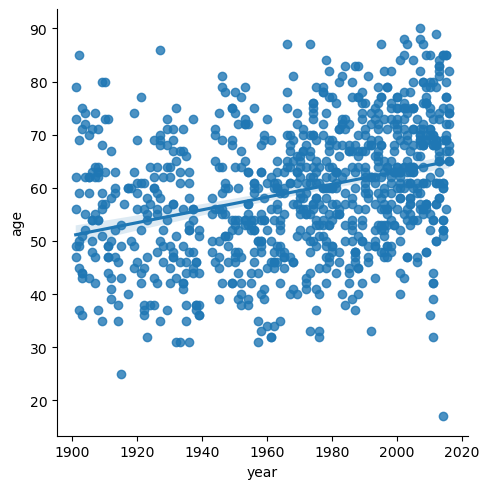

In [150]:
seaborn.lmplot(data = nobel_data_valid, x = 'year', y = 'age')

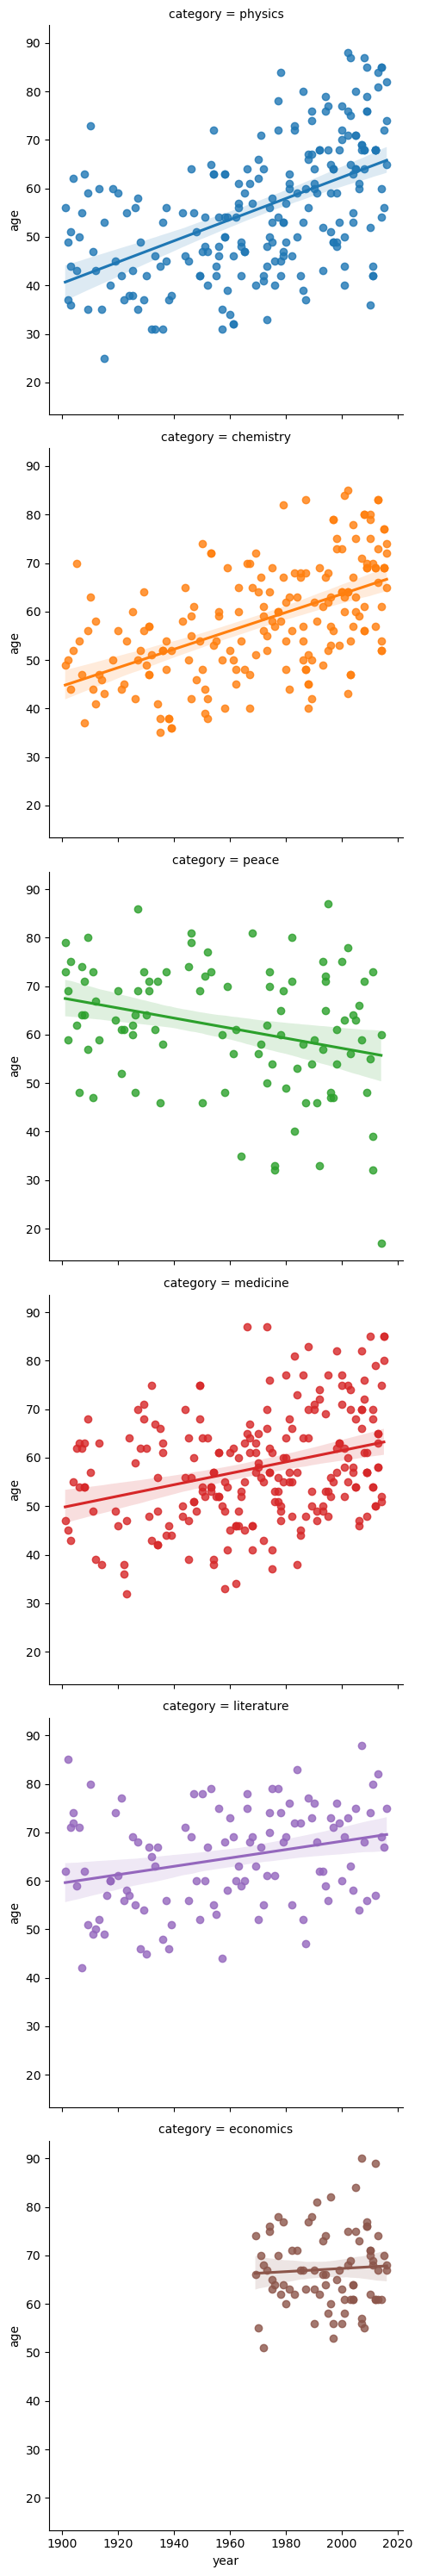

In [151]:
seaborn.lmplot(data = nobel_data_valid, x = 'year', y = 'age', row = 'category', hue = 'category')

### Question 4: Which universities dominate the Nobel Prize?

In [152]:
university_data = nobel_data_raw.groupby(['name'])['share'].count().sort_values(ascending = False).head(10)
university_data

name
University of California                        34
Harvard University                              27
Massachusetts Institute of Technology (MIT)     18
Stanford University                             18
California Institute of Technology (Caltech)    17
University of Cambridge                         17
University of Chicago                           17
Columbia University                             16
Princeton University                            14
Rockefeller University                          11
Name: share, dtype: int64

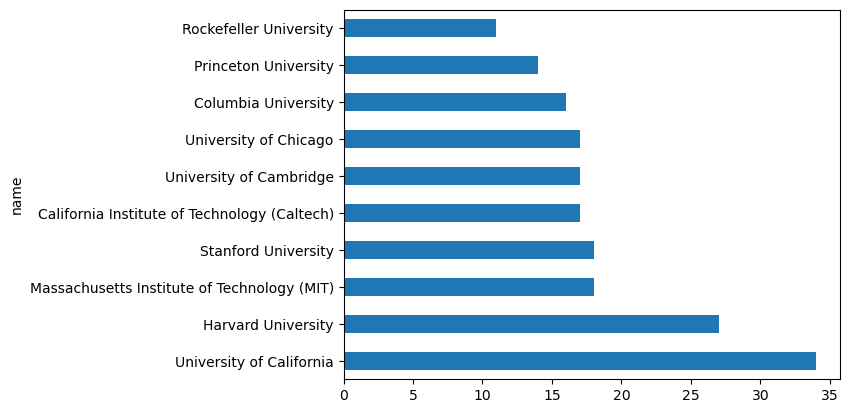

In [153]:
university_data_plot = university_data.plot.barh(y = 'name')

In [154]:
physics = nobel_data_raw.loc[nobel_data_raw['category']=='physics']
physics_data = physics.groupby(['name'])['share'].count().sort_values(ascending = False).head(10)
physics_data

name
University of California                        11
Stanford University                              9
Harvard University                               8
University of Cambridge                          7
California Institute of Technology (Caltech)     7
Massachusetts Institute of Technology (MIT)      7
Princeton University                             7
P.N. Lebedev Physical Institute                  6
Columbia University                              6
Bell Laboratories                                4
Name: share, dtype: int64

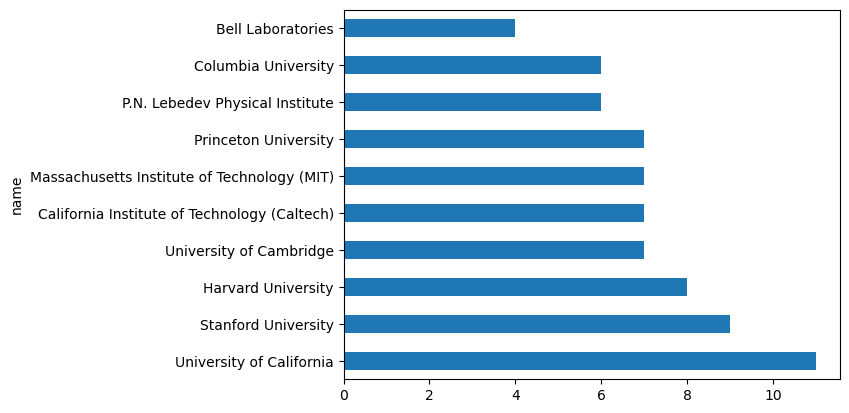

In [155]:
physics_data_plot = physics_data.plot.barh(y = 'name')

In [156]:
chemistry = nobel_data_raw.loc[nobel_data_raw['category']=='chemistry']
chemistry_data = chemistry.groupby(['name'])['share'].count().sort_values(ascending = False).head(10)
chemistry_data

name
University of California                                                        13
MRC Laboratory of Molecular Biology                                              6
Howard Hughes Medical Institute                                                  6
Harvard University                                                               6
Berlin University                                                                5
Stanford University                                                              5
University of Heidelberg                                                         4
Eidgenössische Technische Hochschule (Swiss Federal Institute of Technology)     4
Rockefeller University                                                           4
California Institute of Technology (Caltech)                                     4
Name: share, dtype: int64

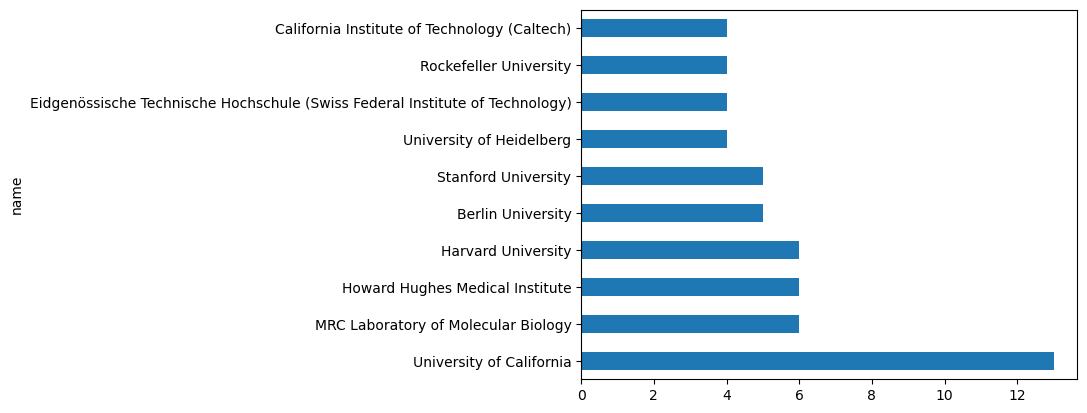

In [157]:
chemistry_data_plot = chemistry_data.plot.barh(y = 'name')

In [158]:
medicine = nobel_data_raw.loc[nobel_data_raw['category']=='medicine']
medicine_data = medicine.groupby(['name'])['share'].count().sort_values(ascending = False).head(10)
medicine_data

name
Rockefeller University                          7
Harvard Medical School                          6
Harvard University                              6
Institut Pasteur                                6
Howard Hughes Medical Institute                 5
University College                              5
California Institute of Technology (Caltech)    5
University of Oxford                            5
University of Cambridge                         4
Rockefeller Institute for Medical Research      4
Name: share, dtype: int64

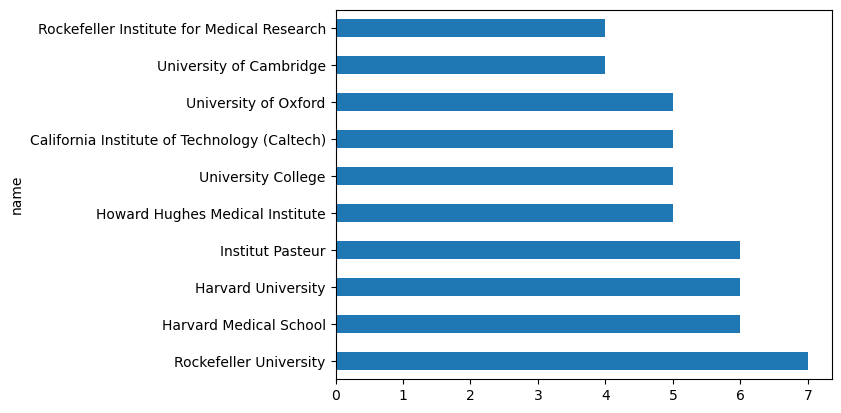

In [159]:
medicine_data_plot = medicine_data.plot.barh(y = 'name')

In [160]:
peace = nobel_data_raw.loc[nobel_data_raw['category']=='peace']
peace_data = peace.groupby(['name'])['share'].count().sort_values(ascending = False).head(10)
peace_data

name
California Institute of Technology (Caltech)    1
Columbia University                             1
Harvard University                              1
Sorbonne University                             1
Name: share, dtype: int64

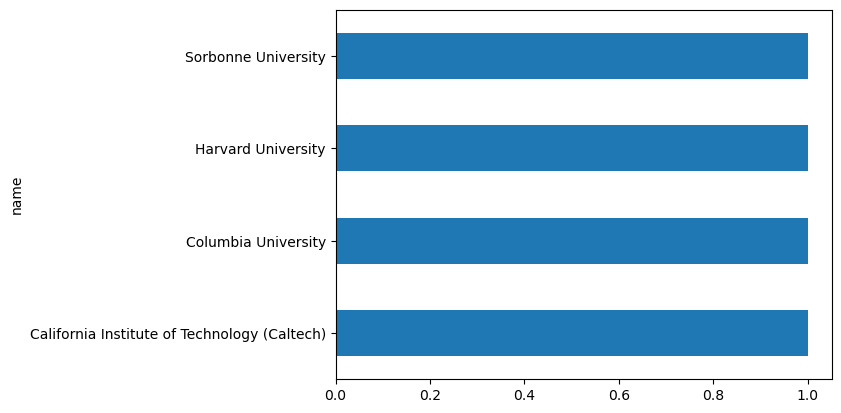

In [161]:
peace_data_plot = peace_data.plot.barh(y = 'name')

In [162]:
economics = nobel_data_raw.loc[nobel_data_raw['category']=='economics']
economics_data = economics.groupby(['name'])['share'].count().sort_values(ascending = False).head(10)
economics_data

name
University of Chicago                          12
University of California                        8
Harvard University                              6
Princeton University                            6
Massachusetts Institute of Technology (MIT)     5
Columbia University                             4
Yale University                                 3
University of Cambridge                         3
New York University                             2
Stanford University                             2
Name: share, dtype: int64

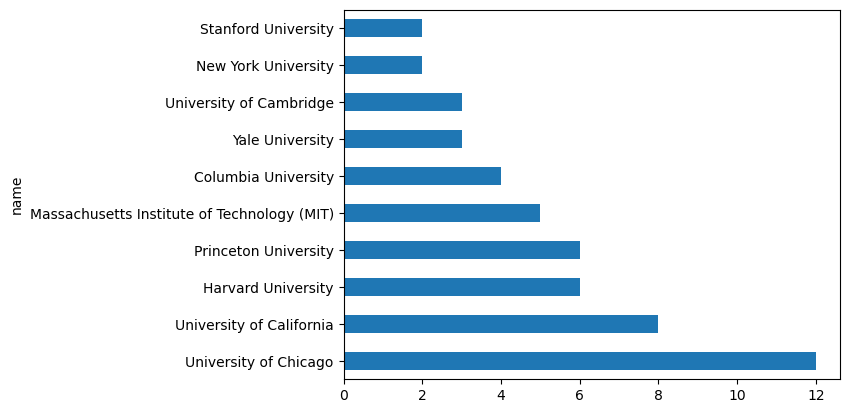

In [163]:
economics_data_plot = economics_data.plot.barh(y = 'name')

## Data Description 
### What are the observations (rows) and the attributes (columns)?

The observations in our data frame are 937 Nobel Prize laureates. In other words, each row represents a single laureate.

The attributes are:

- id - identifies each laureate 
- firstname - laureate's first name 
- surname - laureate's surname 
- born - laureate's birth date 
- died - laureate's death date 
- bornCountry - laureate's birth place 
- bornCountryCode - the country code of the laureate's country of origin
- bornCity - the name of the city where the laureate was born
- diedCountry - the name of the country where the laureate died
- diedCountryCode - the country code of the laureate's country of death
- diedCity - the name of the city where the laureate died
- gender - laureate's gender or laureate's organization ('male,' 'female,' or 'org' - organization)
- year - the year that the laureate won their prize
- category - the category in which the laureate won their prize ('physics,' 'chemistry,' 'peace,' 'medicine,' 'literature,' 'economics')
- overallMotivation - overall motivation for being awarded the prize
- share - number of other laureates who share the prize 
- motivation - the motivation behind being awarded the prize

### Why was this dataset created?

Who created the dataset (e.g., which team, research group) and on behalf of which entity (e.g., company, institution, organization)?

### Who funded the creation of the dataset?

What do the instances that comprise the dataset represent (e.g., documents, photos, people, countries)?

How many instances are there in total (of each type, if appropriate)?

Does the dataset contain all possible instances or is it a sample (not necessarily random) of instances from a larger set?

What data does each instance consist of?

Is any information missing from individual instances?

Are there any errors, sources of noise, or redundancies in the dataset?

Does the dataset identify any subpopulations (e.g., by age, gender)? If so, please describe how these subpopulations are identified and provide a description of their respective distributions within the dataset.

Is it possible to identify individuals (i.e., one or more natural persons), either directly or indirectly (i.e., in combination with other data) from the dataset? If so, please describe how.

How was the data associated with each instance acquired?

### What processes might have influenced what data was observed and recorded and what was not?

### What preprocessing was done, and how did the data come to be in the form that you are using?

### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

### Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box)


## Data Limitations

One primary limitation of our data is that it was collected in 2016: there have been 6 years' worth of laureates since then, data about whom we were not able to work with. 

## Exploratory Data Analysis